## Transfer function matrices

Let's say we have two inputs and two outputs. We can write the linearised effect as follows:

\begin{align}
y_1 &= G_{11} u_1 + G_{12} u_2 \\
y_2 &= G_{21} u_1 + G_{22} u_2
\end{align}

Which is equivalent to a matrix expression

$$\mathbf{y} = G \mathbf{u}$$

with 

$$\mathbf{y} = \begin{bmatrix}y_1\\y_2\end{bmatrix} 
  \quad G = \begin{bmatrix}G_{11} & G_{12} \\ G_{21} & G_{22} \end{bmatrix}
  \quad \mathbf{u} = \begin{bmatrix}u_1\\u_2\end{bmatrix}$$


I find it useful to picture the input going into the top of the matrix and the output coming out of the side as shown in this animation

![Matrix multiplication](../../assets/mmult.gif)

### Representing matrices in SymPy

In [1]:
import sympy
sympy.init_printing()

In [2]:
s = sympy.Symbol('s')

In [3]:
G11 = (s + 1)/(s + 2)
G12 = 1/(2*s + 1)
G21 = 1/(3*s + 1) 
G22 = 1/(4*s + 1)

row1 = [G11, G12]
row2 = [G21, G22]
list_of_lists = [row1, 
                 row2]

In [4]:
G = sympy.Matrix(list_of_lists)

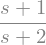

In [5]:
G[0, 0]

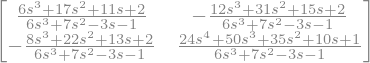

In [6]:
sympy.simplify(G.inv())

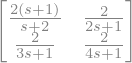

In [7]:
G + G

### Representing matrices using the control library

In [8]:
import control

In [9]:
control.tf([0, 1], [1, 2])

TransferFunction(array([1]), array([1, 2]))

In [10]:
s = control.tf([1, 0], 1)

In [11]:
s

TransferFunction(array([1, 0]), array([1]))

In [12]:
G = 1/(s + 1)

In [13]:
num11 = [1, 2]
num12 = [2]
num21 = [3]
num22 = [4]

row1 = [num11, num12]
row2 = [num21, num22]
numerator = [row1, 
             row2]


denominator = [[[1, 1], [2, 1]], 
               [[3, 1], [4, 1]]]
Gmatrix = control.tf(numerator, 
           denominator)

In [14]:
Gmatrix

TransferFunction([[array([1, 2]), array([2])], [array([3]), array([4])]], [[array([1, 1]), array([2, 1])], [array([3, 1]), array([4, 1])]])

## Conversion to state space

See the [state space notebook](State%20space.ipynb) for more information about conversion between state space and transfer function form. The examples in that notebook are for SISO transfer functions.

There are no tools in `scipy.signal` to deal with mutlivariable transfer functions. However, the control library can do the conversion from a transfer function matrix to a state space form if you have the [slycot]() library installed.

You can try to install slycot using this command:

In [15]:
#!conda install -c conda-forge control slycot

In [16]:
control.ss(Gmatrix)

StateSpace(array([[-1.33333333e+00, -1.11022302e-16, -1.66533454e-16,
        -3.33333333e-01],
       [-3.33066907e-16, -7.50000000e-01, -1.25000000e-01,
         6.93889390e-17],
       [ 1.11022302e-16,  1.00000000e+00, -2.10075805e-16,
        -3.40587617e-16],
       [ 1.00000000e+00,  0.00000000e+00,  1.31257168e-16,
        -9.52355269e-17]]), array([[ 1.00000000e+00, -1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]]), array([[1.        , 1.        , 0.25      , 0.33333333],
       [1.        , 1.        , 0.5       , 1.        ]]), array([[1., 0.],
       [0., 0.]]))

What are the true values of those small (10$^{-16}$) values?